In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from dataprep.eda import create_report

In [2]:
df_NOAA = pd.read_csv('NOAA_cleaned.csv')
df_POD = pd.read_csv('POD_cleaned.csv')

In [3]:
df_NOAA

USAF   WBAN STATIONNAME COUNTRYNAME    LAT     LON       BEGIN  \
0        816820  99999   CASTANHAL      BRAZIL -1.300 -47.950  2016-07-04   
1        816820  99999   CASTANHAL      BRAZIL -1.300 -47.950  2016-07-04   
2        816820  99999   CASTANHAL      BRAZIL -1.300 -47.950  2016-07-04   
3        816820  99999   CASTANHAL      BRAZIL -1.300 -47.950  2016-07-04   
4        816820  99999   CASTANHAL      BRAZIL -1.300 -47.950  2016-07-04   
...         ...    ...         ...         ...    ...     ...         ...   
1251405  816800  99999       BELEM      BRAZIL -1.417 -48.433  2016-07-04   
1251406  816800  99999       BELEM      BRAZIL -1.417 -48.433  2016-07-04   
1251407  816800  99999       BELEM      BRAZIL -1.417 -48.433  2016-07-04   
1251408  816800  99999       BELEM      BRAZIL -1.417 -48.433  2016-07-04   
1251409  816800  99999       BELEM      BRAZIL -1.417 -48.433  2016-07-04   

                END    TEMP_°C    DEWP_°C     MAX_°C     MIN_°C  PRCP_mm  \
0        2023-03-09  24.555555  22.555555  29.722222  22.722222      0.0   
1        2023-03-09  25.388888  23.000000  30.111111  23.500000      0.0   
2        2023-03-09  25.888888  23.222222  31.277777  23.388888      0.0   
3        2023-03-09  25.444444  23.500000  28.388888  23.277777      0.0   
4        2023-03-09  24.444444  22.277777  30.888888  22.611111      0.0   
...             ...        ...        ...        ...        ...      ...   
1251405  2023-03-09  25.055555  23.666666  28.111111  23.111111      0.0   
1251406  2023-03-09  24.277777  23.555555  26.888888  23.111111      0.0   
1251407  2023-03-09  24.944444  23.888888  28.111111  23.722222      0.0   
1251408  2023-03-09  26.055555  23.777777  31.277777  23.888888      0.0   
1251409  2023-03-09  25.833333  23.777777  32.222222  23.000000      0.0   

         RainOrDrizzle  Thunder        DATE  
0                False    False  2020-01-01  
1                False    False  2020-01-02  
2                False    False  2020-01-03  
3                False    False  2020-01-04  
4                False    False  2020-01-06  
...                ...      ...         ...  
1251405          False    False  2023-03-13  
1251406          False    False  2023-03-14  
1251407          False    False  2023-03-15  
1251408          False    False  2023-03-16  
1251409          False    False  2023-03-17  

[1251410 rows x 16 columns]

In [6]:
df_NOAA['COUNTRYNAME'].unique()

array(['BRAZIL', 'CAMEROON', 'GHANA', "COTE D'IVOIRE"], dtype=object)

In [7]:
df_NOAA = df_NOAA[df_NOAA['COUNTRYNAME'] == "COTE D'IVOIRE"]

In [8]:
df_NOAA

USAF   WBAN       STATIONNAME    COUNTRYNAME   LAT    LON  \
1165092  655280  99999           ODIENNE  COTE D'IVOIRE  9.50 -7.567   
1165093  655280  99999           ODIENNE  COTE D'IVOIRE  9.50 -7.567   
1165094  655280  99999           ODIENNE  COTE D'IVOIRE  9.50 -7.567   
1165095  655280  99999           ODIENNE  COTE D'IVOIRE  9.50 -7.567   
1165096  655280  99999           ODIENNE  COTE D'IVOIRE  9.50 -7.567   
...         ...    ...               ...            ...   ...    ...   
1248606  655990  99999  SASSANDRA/DREWIN  COTE D'IVOIRE  4.95 -6.083   
1248607  655990  99999  SASSANDRA/DREWIN  COTE D'IVOIRE  4.95 -6.083   
1248608  655990  99999  SASSANDRA/DREWIN  COTE D'IVOIRE  4.95 -6.083   
1248609  655990  99999  SASSANDRA/DREWIN  COTE D'IVOIRE  4.95 -6.083   
1248610  655990  99999  SASSANDRA/DREWIN  COTE D'IVOIRE  4.95 -6.083   

              BEGIN         END    TEMP_°C    DEWP_°C     MAX_°C     MIN_°C  \
1165092  1949-04-02  2023-03-09  24.111111  20.666666  30.000000  19.222222   
1165093  1949-04-02  2023-03-09  23.944444  18.500000  29.611111  18.500000   
1165094  1949-04-02  2023-03-09  23.444444  13.166666  31.500000  16.111111   
1165095  1949-04-02  2023-03-09  25.555555  16.277777  33.222222  16.777777   
1165096  1949-04-02  2023-03-09  27.722222  19.833333  33.500000  20.222222   
...             ...         ...        ...        ...        ...        ...   
1248606  1949-04-02  2023-03-09  26.555555  23.888888  30.111111  22.500000   
1248607  1949-04-02  2023-03-09  28.000000  25.333333  31.500000  22.277777   
1248608  1949-04-02  2023-03-09  29.444444  25.611111  36.611111  25.222222   
1248609  1949-04-02  2023-03-09  27.555555  24.055555  31.500000  22.500000   
1248610  1949-04-02  2023-03-09  28.944444  25.111111  32.277777  25.000000   

         PRCP_mm  RainOrDrizzle  Thunder        DATE  
1165092   11.938           True     True  2000-01-02  
1165093   39.878           True     True  2000-01-03  
1165094    0.000          False    False  2000-01-04  
1165095    0.000          False    False  2000-01-07  
1165096    0.000          False    False  2000-01-10  
...          ...            ...      ...         ...  
1248606    0.000          False    False  2023-03-13  
1248607    0.000          False    False  2023-03-14  
1248608    0.000          False    False  2023-03-15  
1248609    0.000          False    False  2023-03-16  
1248610    0.000          False    False  2023-03-17  

[83519 rows x 16 columns]

In [10]:
df_NOAA['STATIONNAME'].value_counts()

ABIDJAN FELIX HOUPHOUET BOIGNY INTL    8266
SASSANDRA/DREWIN                       7269
GAGNOA                                 7231
DIMBOKRO CITY                          7196
ADIAKE                                 7089
TABOU                                  7070
BONDOUKOU/SOKO                         7008
DALOA                                  6999
YAMOUSSOUKRO                           6614
SAN PEDRO                              6190
BOUAKE                                 3311
KORHOGO                                3225
MAN                                    3050
ODIENNE                                3001
Name: STATIONNAME, dtype: int64

Wybór stacji z najliczniejszą liczbą próbek, która występuje jako jedyna w regionie. **GAGNOA** dla regionu **Goh-dijboua**

In [11]:
df_NOAA = df_NOAA[df_NOAA['STATIONNAME'] == 'GAGNOA']

In [12]:
df_NOAA

USAF   WBAN STATIONNAME    COUNTRYNAME    LAT   LON       BEGIN  \
1184687  655570  99999      GAGNOA  COTE D'IVOIRE  6.133 -5.95  1950-02-17   
1184688  655570  99999      GAGNOA  COTE D'IVOIRE  6.133 -5.95  1950-02-17   
1184689  655570  99999      GAGNOA  COTE D'IVOIRE  6.133 -5.95  1950-02-17   
1184690  655570  99999      GAGNOA  COTE D'IVOIRE  6.133 -5.95  1950-02-17   
1184691  655570  99999      GAGNOA  COTE D'IVOIRE  6.133 -5.95  1950-02-17   
...         ...    ...         ...            ...    ...   ...         ...   
1191913  655570  99999      GAGNOA  COTE D'IVOIRE  6.133 -5.95  1950-02-17   
1191914  655570  99999      GAGNOA  COTE D'IVOIRE  6.133 -5.95  1950-02-17   
1191915  655570  99999      GAGNOA  COTE D'IVOIRE  6.133 -5.95  1950-02-17   
1191916  655570  99999      GAGNOA  COTE D'IVOIRE  6.133 -5.95  1950-02-17   
1191917  655570  99999      GAGNOA  COTE D'IVOIRE  6.133 -5.95  1950-02-17   

                END    TEMP_°C    DEWP_°C     MAX_°C     MIN_°C  PRCP_mm  \
1184687  2023-03-09  25.388888  21.833333  32.611111  20.000000    0.000   
1184688  2023-03-09  25.666666  21.500000  32.000000  19.500000    0.000   
1184689  2023-03-09  25.277777  18.111111  32.222222  18.111111    0.000   
1184690  2023-03-09  24.777777  19.833333  34.000000  18.000000    0.000   
1184691  2023-03-09  26.277777  22.944444  32.222222  20.500000    0.000   
...             ...        ...        ...        ...        ...      ...   
1191913  2023-03-09  27.666666  22.333333  33.500000  21.888888   17.526   
1191914  2023-03-09  27.833333  22.333333  33.500000  23.222222    0.000   
1191915  2023-03-09  26.888888  22.444444  33.722222  22.500000    0.000   
1191916  2023-03-09  27.833333  21.166666  34.111111  22.277777    0.000   
1191917  2023-03-09  29.111111  22.222222  34.388888  23.777777    0.000   

         RainOrDrizzle  Thunder        DATE  
1184687          False     True  2000-01-02  
1184688          False    False  2000-01-03  
1184689          False    False  2000-01-04  
1184690          False    False  2000-01-07  
1184691          False    False  2000-01-10  
...                ...      ...         ...  
1191913          False    False  2023-03-13  
1191914          False    False  2023-03-14  
1191915          False    False  2023-03-15  
1191916          False    False  2023-03-16  
1191917          False    False  2023-03-17  

[7231 rows x 16 columns]

In [14]:
# Usunięcie niepotrzebnych kolumn dla przygotowanej ramki danych NOAA
df_NOAA = df_NOAA.drop(columns=['USAF', 'WBAN', 'STATIONNAME', 'COUNTRYNAME', 'LAT', 'LON', 'BEGIN', 'END'])

In [16]:
df_NOAA

TEMP_°C    DEWP_°C     MAX_°C     MIN_°C  PRCP_mm  RainOrDrizzle  \
1184687  25.388888  21.833333  32.611111  20.000000    0.000          False   
1184688  25.666666  21.500000  32.000000  19.500000    0.000          False   
1184689  25.277777  18.111111  32.222222  18.111111    0.000          False   
1184690  24.777777  19.833333  34.000000  18.000000    0.000          False   
1184691  26.277777  22.944444  32.222222  20.500000    0.000          False   
...            ...        ...        ...        ...      ...            ...   
1191913  27.666666  22.333333  33.500000  21.888888   17.526          False   
1191914  27.833333  22.333333  33.500000  23.222222    0.000          False   
1191915  26.888888  22.444444  33.722222  22.500000    0.000          False   
1191916  27.833333  21.166666  34.111111  22.277777    0.000          False   
1191917  29.111111  22.222222  34.388888  23.777777    0.000          False   

         Thunder        DATE  
1184687     True  2000-01-02  
1184688    False  2000-01-03  
1184689    False  2000-01-04  
1184690    False  2000-01-07  
1184691    False  2000-01-10  
...          ...         ...  
1191913    False  2023-03-13  
1191914    False  2023-03-14  
1191915    False  2023-03-15  
1191916    False  2023-03-16  
1191917    False  2023-03-17  

[7231 rows x 8 columns]

In [17]:
df_NOAA.set_index('DATE', inplace=True)

In [23]:
df_NOAA

TEMP_°C    DEWP_°C     MAX_°C     MIN_°C  PRCP_mm  \
DATE                                                              
2000-01-02  25.388888  21.833333  32.611111  20.000000    0.000   
2000-01-03  25.666666  21.500000  32.000000  19.500000    0.000   
2000-01-04  25.277777  18.111111  32.222222  18.111111    0.000   
2000-01-07  24.777777  19.833333  34.000000  18.000000    0.000   
2000-01-10  26.277777  22.944444  32.222222  20.500000    0.000   
...               ...        ...        ...        ...      ...   
2023-03-13  27.666666  22.333333  33.500000  21.888888   17.526   
2023-03-14  27.833333  22.333333  33.500000  23.222222    0.000   
2023-03-15  26.888888  22.444444  33.722222  22.500000    0.000   
2023-03-16  27.833333  21.166666  34.111111  22.277777    0.000   
2023-03-17  29.111111  22.222222  34.388888  23.777777    0.000   

            RainOrDrizzle  Thunder  
DATE                                
2000-01-02              0        1  
2000-01-03              0        0  
2000-01-04              0        0  
2000-01-07              0        0  
2000-01-10              0        0  
...                   ...      ...  
2023-03-13              0        0  
2023-03-14              0        0  
2023-03-15              0        0  
2023-03-16              0        0  
2023-03-17              0        0  

[7231 rows x 7 columns]

In [22]:
df_NOAA[['RainOrDrizzle', 'Thunder']] = df_NOAA[['RainOrDrizzle', 'Thunder']].astype(int)

In [33]:
df_NOAA.isnull().sum()

TEMP_°C            0
DEWP_°C           16
MAX_°C             0
MIN_°C             0
PRCP_mm          147
RainOrDrizzle      0
Thunder            0
dtype: int64

In [35]:
df_NOAA.interpolate().isnull().sum()

TEMP_°C          0
DEWP_°C          0
MAX_°C           0
MIN_°C           0
PRCP_mm          0
RainOrDrizzle    0
Thunder          0
dtype: int64

In [36]:
df_NOAA = df_NOAA.interpolate()

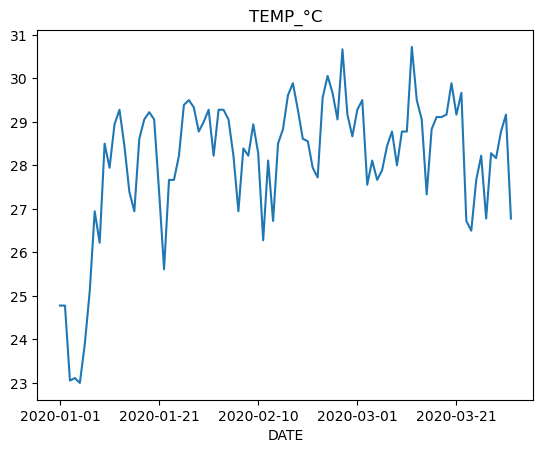

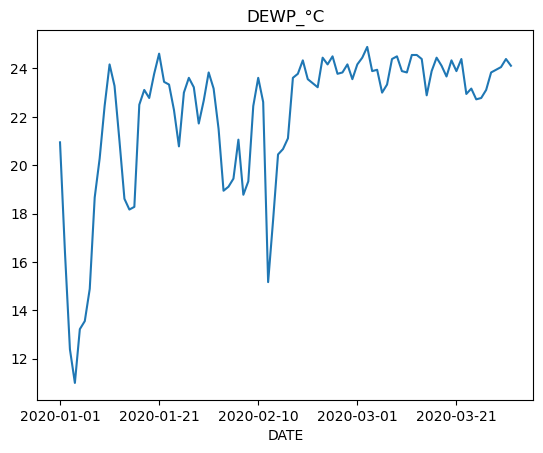

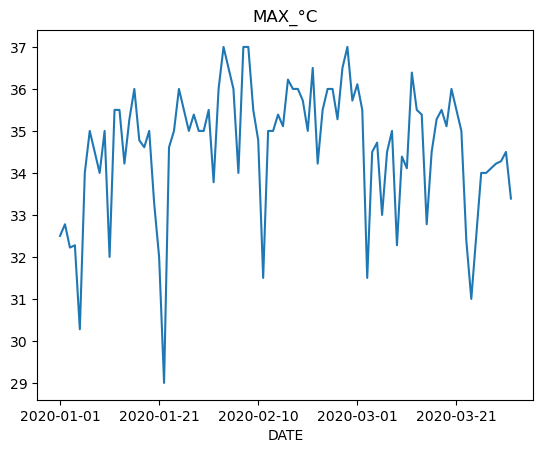

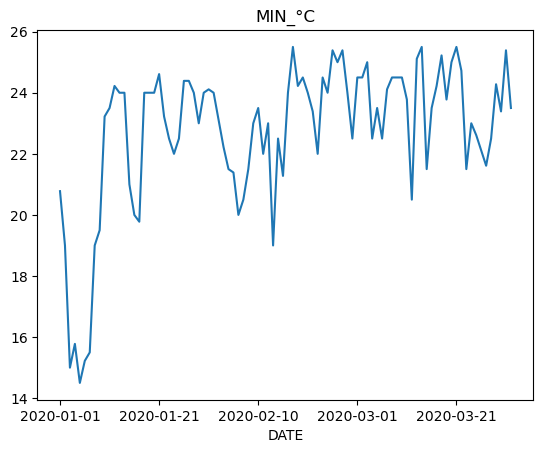

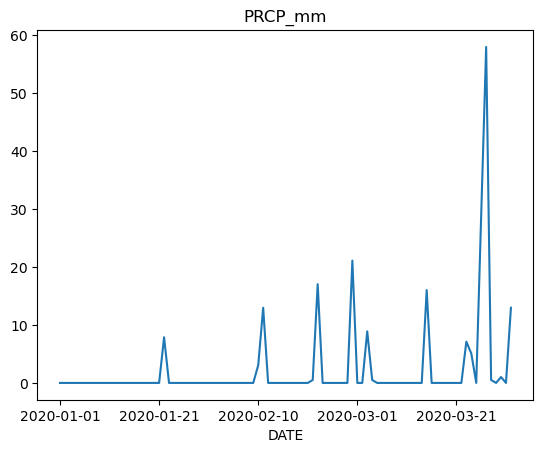

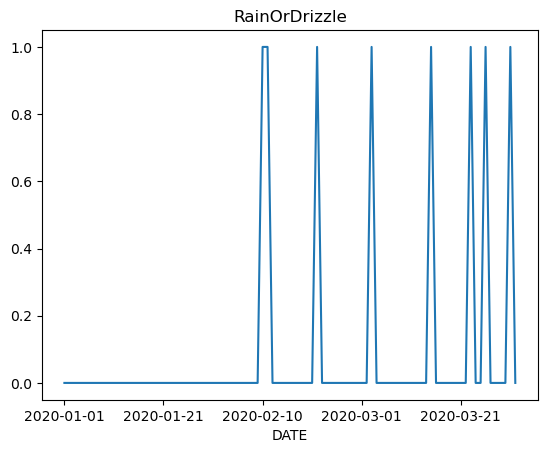

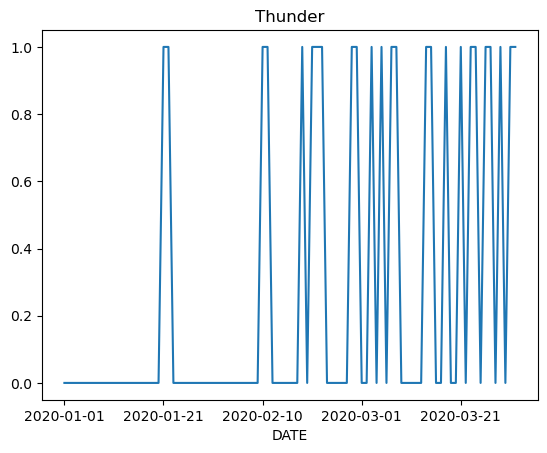

In [37]:
for column in list(df_NOAA.columns):
    df_NOAA['2020-01-01':'2020-04-01'][column].plot(title=column)
    plt.show()

In [41]:
df_NOAA.reset_index(inplace=True)

In [45]:
df_NOAA['DATE'] = pd.to_datetime(df_NOAA['DATE'])

In [48]:
df_NOAA.groupby([pd.Grouper(freq='m', key='DATE')])[['TEMP_°C', 'DEWP_°C', 'MAX_°C',	'MIN_°C', 'PRCP_mm', 'RainOrDrizzle', 'Thunder']].sum().groupby(level=0).mean()

TEMP_°C     DEWP_°C       MAX_°C      MIN_°C  PRCP_mm  \
DATE                                                                   
2000-01-31  546.166656  474.777769   669.277772  431.833331  101.092   
2000-02-29  398.611106  307.444439   492.111105  323.722218    8.382   
2000-03-31  758.777767  606.222210   944.444436  629.777775   59.182   
2000-04-30  326.166659  274.861106   405.722218  261.388887   32.766   
2000-05-31  130.833331  116.666664   165.833333  113.000000   37.084   
...                ...         ...          ...         ...      ...   
2022-11-30  773.166652  674.833320   960.222212  658.444431  150.876   
2022-12-31  788.166651  653.722211   983.444434  651.555543   26.162   
2023-01-31  837.111097  659.333318  1080.999993  657.999994   29.210   
2023-02-28  787.388875  642.777766   968.166660  650.888881   53.340   
2023-03-31  464.666659  383.722214   563.499994  386.555548   87.630   

            RainOrDrizzle  Thunder  
DATE                                
2000-01-31            2.0      6.0  
2000-02-29            1.0      4.0  
2000-03-31            2.0      7.0  
2000-04-30            1.0      3.0  
2000-05-31            2.0      4.0  
...                   ...      ...  
2022-11-30            7.0     10.0  
2022-12-31            0.0      4.0  
2023-01-31            1.0      3.0  
2023-02-28            1.0     10.0  
2023-03-31            3.0      5.0  

[279 rows x 7 columns]

In [53]:
# df_NOAA['month'] = pd.to_datetime(df_NOAA['DATE']).dt.month
# df_NOAA['year'] = pd.to_datetime(df_NOAA['DATE']).dt.year
df_NOAA = df_NOAA.groupby(['year','month'],as_index=False).mean()

C:\Users\BC127735\AppData\Local\Temp\ipykernel_16828\4231351493.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_NOAA = df_NOAA.groupby(['year','month'],as_index=False).mean()


In [55]:
df_NOAA

year  month    TEMP_°C    DEWP_°C     MAX_°C     MIN_°C   PRCP_mm  \
0    2000      1  26.007936  22.608465  31.870370  20.563492  4.813905   
1    2000      2  28.472222  21.960317  35.150793  23.123016  0.598714   
2    2000      3  28.102880  22.452674  34.979424  23.325103  2.191926   
3    2000      4  27.180555  22.905092  33.810185  21.782407  2.730500   
4    2000      5  26.166666  23.333333  33.166667  22.600000  7.416800   
..    ...    ...        ...        ...        ...        ...       ...   
270  2022     11  25.772222  22.494444  32.007407  21.948148  5.029200   
271  2022     12  26.272222  21.790740  32.781481  21.718518  0.872067   
272  2023      1  27.003584  21.268817  34.870968  21.225806  0.942258   
273  2023      2  28.121031  22.956349  34.577381  23.246031  1.905000   
274  2023      3  27.333333  22.571895  33.147058  22.738562  5.154706   

     RainOrDrizzle   Thunder  
0         0.095238  0.285714  
1         0.071429  0.285714  
2         0.074074  0.259259  
3         0.083333  0.250000  
4         0.400000  0.800000  
..             ...       ...  
270       0.233333  0.333333  
271       0.000000  0.133333  
272       0.032258  0.096774  
273       0.035714  0.357143  
274       0.176471  0.294118  

[275 rows x 9 columns]

In [56]:
from datetime import datetime

In [62]:
df_NOAA['DATE'] = [datetime(int(row["year"]), int(row["month"]), 1) for index, row in df_NOAA.iterrows()]

In [63]:
df_NOAA = df_NOAA.drop(columns=['year', 'month'])

In [92]:
df_NOAA['DATE'] = pd.to_datetime(df_NOAA['DATE'])
df_NOAA.set_index('DATE', inplace=True)

In [66]:
df_NOAA

TEMP_°C    DEWP_°C     MAX_°C     MIN_°C   PRCP_mm  \
DATE                                                               
2000-01-01  26.007936  22.608465  31.870370  20.563492  4.813905   
2000-02-01  28.472222  21.960317  35.150793  23.123016  0.598714   
2000-03-01  28.102880  22.452674  34.979424  23.325103  2.191926   
2000-04-01  27.180555  22.905092  33.810185  21.782407  2.730500   
2000-05-01  26.166666  23.333333  33.166667  22.600000  7.416800   
...               ...        ...        ...        ...       ...   
2022-11-01  25.772222  22.494444  32.007407  21.948148  5.029200   
2022-12-01  26.272222  21.790740  32.781481  21.718518  0.872067   
2023-01-01  27.003584  21.268817  34.870968  21.225806  0.942258   
2023-02-01  28.121031  22.956349  34.577381  23.246031  1.905000   
2023-03-01  27.333333  22.571895  33.147058  22.738562  5.154706   

            RainOrDrizzle   Thunder  
DATE                                 
2000-01-01       0.095238  0.285714  
2000-02-01       0.071429  0.285714  
2000-03-01       0.074074  0.259259  
2000-04-01       0.083333  0.250000  
2000-05-01       0.400000  0.800000  
...                   ...       ...  
2022-11-01       0.233333  0.333333  
2022-12-01       0.000000  0.133333  
2023-01-01       0.032258  0.096774  
2023-02-01       0.035714  0.357143  
2023-03-01       0.176471  0.294118  

[275 rows x 7 columns]

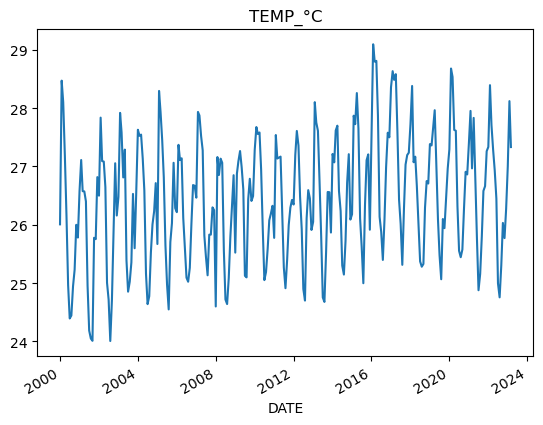

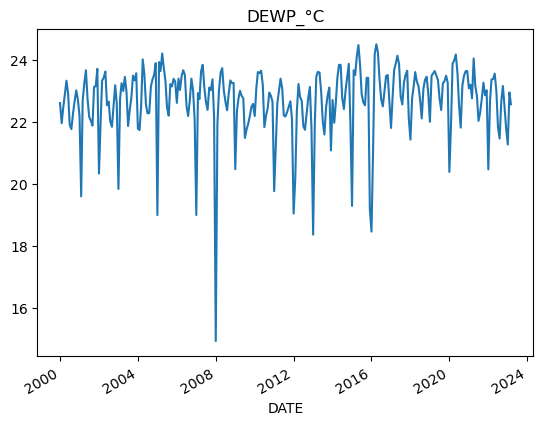

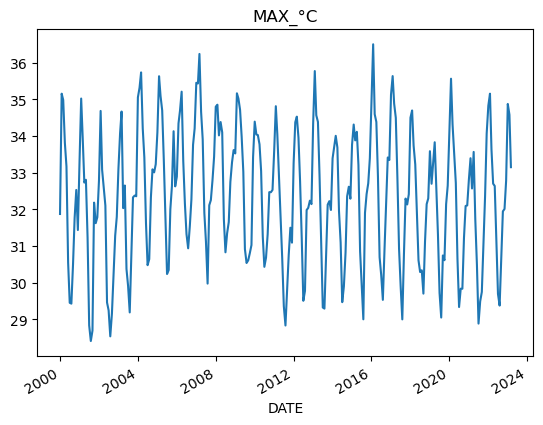

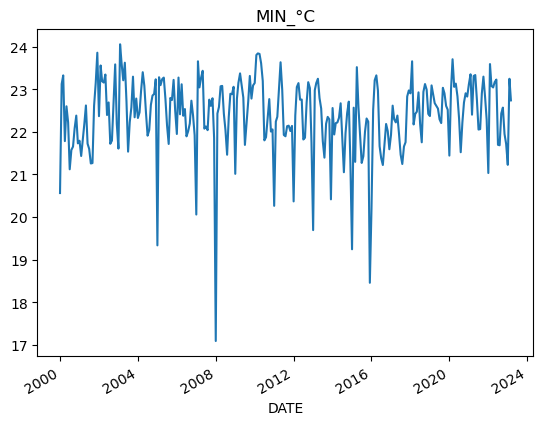

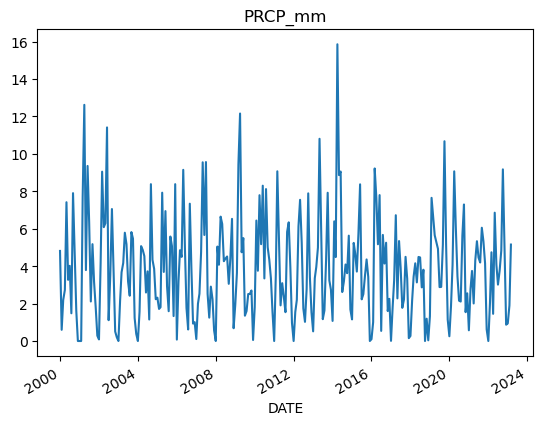

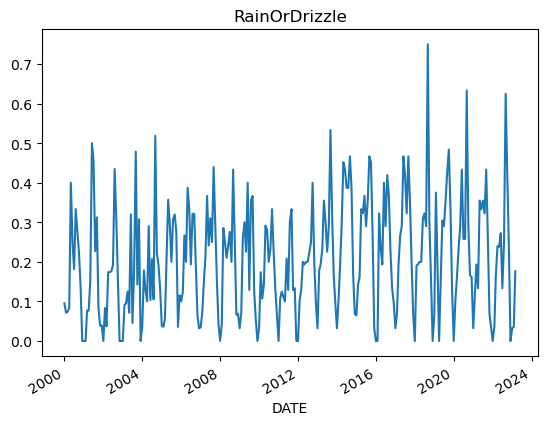

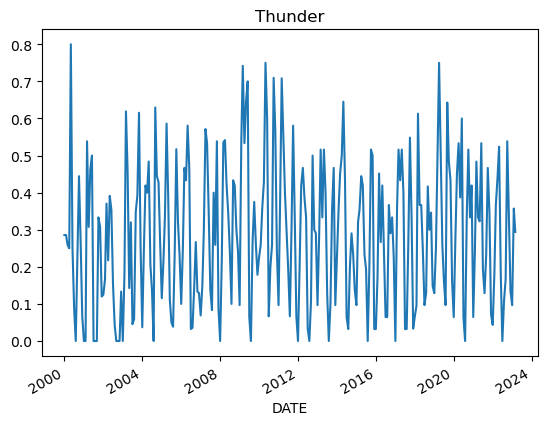

In [67]:
for column in list(df_NOAA.columns):
    df_NOAA[column].plot(title=column)
    plt.show()

In [76]:
# df_POD.set_index('Date', inplace=True)
df_POD.reset_index(inplace=True)

In [72]:
df_POD = df_POD[df_POD['Country'] == 'Cote d Ivoire']

In [77]:
df_POD

Date        Country  Total
0      1997-10-01  Cote d Ivoire  111.0
1      1997-10-01  Cote d Ivoire  197.0
2      1997-10-01  Cote d Ivoire  106.0
3      1997-10-01  Cote d Ivoire  231.0
4      1997-10-01  Cote d Ivoire  192.0
...           ...            ...    ...
21042  2023-02-01  Cote d Ivoire    7.0
21043  2023-02-01  Cote d Ivoire   67.0
21044  2023-02-01  Cote d Ivoire    8.0
21045  2023-02-01  Cote d Ivoire   39.0
21046  2023-02-01  Cote d Ivoire   23.0

[21047 rows x 3 columns]

In [78]:
df_POD = df_POD.groupby('Date').sum()

C:\Users\BC127735\AppData\Local\Temp\ipykernel_16828\2511391702.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_POD = df_POD.groupby('Date').sum()


In [82]:
df_POD

Total
Date              
1997-10-01  3873.0
1998-01-01  3400.0
1998-03-01  2081.0
1998-05-01  2175.0
1998-06-01  5628.0
...            ...
2022-10-01  8291.0
2022-11-01  7598.0
2022-12-01  6874.0
2023-01-01  6822.0
2023-02-01  6226.0

[246 rows x 1 columns]

In [83]:
df_POD.index = pd.to_datetime(df_POD.index)

In [84]:
period_array = pd.date_range(df_POD.head(1).index.values[0], df_POD.tail(1).index.values[0] + pd.DateOffset(months=1), freq='M')
period_array = [i.replace(day=1).date() for i in period_array]
df_full_period = pd.DataFrame(period_array)
df_full_period = df_full_period.rename(columns={0: 'Date'})
df_full_period["Value"] = 0
df_full_period.set_index('Date', inplace=True)

In [85]:
df_POD = pd.merge(df_POD, df_full_period, right_index=True, left_index=True, how='right')

In [87]:
df_POD = df_POD.drop(columns=['Value'])

In [88]:
df_POD = df_POD.interpolate()

In [89]:
df_POD

Total
Date                   
1997-10-01  3873.000000
1997-11-01  3715.333333
1997-12-01  3557.666667
1998-01-01  3400.000000
1998-02-01  2740.500000
...                 ...
2022-10-01  8291.000000
2022-11-01  7598.000000
2022-12-01  6874.000000
2023-01-01  6822.000000
2023-02-01  6226.000000

[305 rows x 1 columns]

In [95]:
df = pd.merge(df_POD, df_NOAA, left_index=True, right_index=True)

In [96]:
df

Total    TEMP_°C    DEWP_°C     MAX_°C     MIN_°C   PRCP_mm  \
2000-01-01  2569.0  26.007936  22.608465  31.870370  20.563492  4.813905   
2000-02-01  2583.5  28.472222  21.960317  35.150793  23.123016  0.598714   
2000-03-01  2598.0  28.102880  22.452674  34.979424  23.325103  2.191926   
2000-04-01  2696.5  27.180555  22.905092  33.810185  21.782407  2.730500   
2000-05-01  2795.0  26.166666  23.333333  33.166667  22.600000  7.416800   
...            ...        ...        ...        ...        ...       ...   
2022-10-01  8291.0  26.032051  23.162393  31.942307  22.568376  9.173308   
2022-11-01  7598.0  25.772222  22.494444  32.007407  21.948148  5.029200   
2022-12-01  6874.0  26.272222  21.790740  32.781481  21.718518  0.872067   
2023-01-01  6822.0  27.003584  21.268817  34.870968  21.225806  0.942258   
2023-02-01  6226.0  28.121031  22.956349  34.577381  23.246031  1.905000   

            RainOrDrizzle   Thunder  
2000-01-01       0.095238  0.285714  
2000-02-01       0.071429  0.285714  
2000-03-01       0.074074  0.259259  
2000-04-01       0.083333  0.250000  
2000-05-01       0.400000  0.800000  
...                   ...       ...  
2022-10-01       0.423077  0.538462  
2022-11-01       0.233333  0.333333  
2022-12-01       0.000000  0.133333  
2023-01-01       0.032258  0.096774  
2023-02-01       0.035714  0.357143  

[274 rows x 8 columns]

In [97]:
df.to_csv('Ivory_coast_monthly.csv', index=False)

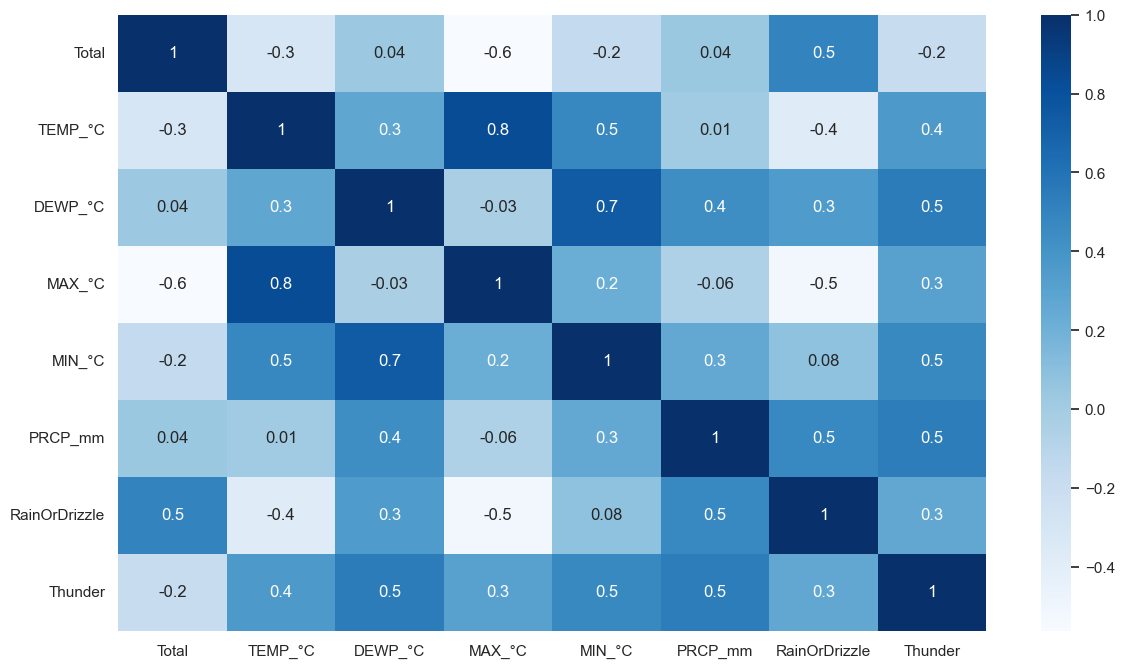

In [99]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')